# Modeling the basic Operations Research Problem in Python, Solvers: PuLP, Gurobi, CPLEX and Google-OR Tools

An optimization model is a problem which has an objective (or a set of objectives in multi-objective programming), a set of constraints, and a set of decision variables. The following is a simple optimization model:

Here is the basic model, I imported the image into the notebook.

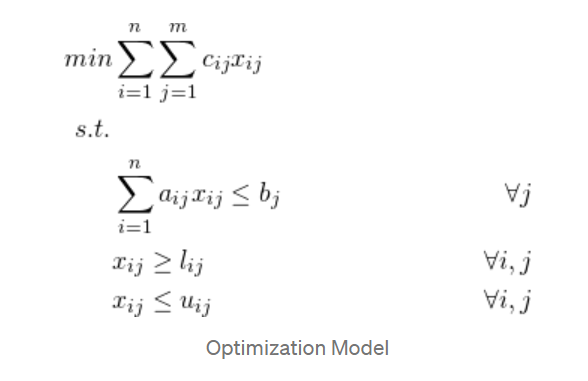

In [7]:
from IPython.display import Image
Image(filename='C:/Users/per35/Pictures/model.png',width=400, height=200)

In the above optimization example, n, m, a, c, l, u and b are input parameters and assumed to be given. 
In order to write Python code, we set these parameters as follows:

In [8]:
import random

n = 50
m = 25
I_set = range(1, n + 1)
J_set = range(1, m + 1)

c = {(i, j) : random.normalvariate(0, 1) for i in I_set for j in J_set}
a = {(i, j) : random.normalvariate(0, 5) for i in I_set for j in J_set}
l = {(i, j) : random.normalvariate(0, 10) for i in I_set for j in J_set}
u = {(i, j) : random.normalvariate(10, 20) for i in I_set for j in J_set}
b = {j : random.randint(0, 30) for j in J_set}

Now its a time to implement the actual OR problem in various solvers:'


    Step-1: Will implement in Gurobi.
    Step-2: Will implement in CPLEX.
    Step-3: Will implement in PuLP
    Step-4: Will implement in Google-OR tools        

# Gurobi Implementation

In [ ]:
#import the gurobi as grb into python:
import gurobiby as grb
opt_model = grb.Model(name = "MIP Model")

Building the decision variables of the model into the python dictionary:
Here the key element acts as a decison variable and the values are deicison variable objects
    

A decision variable is defined mainly on the three properties; such as:

    1. It can be continuous
    2. It can be Integer
    3. It can be binary

In [ ]:
#if x is continuous:
x_vars = {(i, j): opt_model.addVar(vtype = grb.GRB.CONTINUOUS,
                                  lb = l[i, j],
                                  ub = u[i, j],
                                  name = "x_{0}_{1}".format(i, j))
         for i in I_set for j in J_set}

#if x is binary:
x_vars = {(i, j):opt.model.addVar(vtype = grb.GRB.BINARY,
                                  name = "x_{0}_{1}".format(i, j))
          for i in I_set for j in J_set
         }

#if x is Integer:
x_vars = {(i, j): opt_model.addVar(vtype = grb.GRB.CONTINUOUS,
                                  lb = l[i, j],
                                  ub = u[i, j],
                                  name = "x_{0}_{1}".format(i, j))
         for i in I_set for j in J_set}


After adding the decision variables to the model, the next step is to add the constraints to the model.
Any constraints has three parts: 

    Left hand: It is a linear combination of decision variables
    Right hand: Generally a numberic value
    sense: Less than, Greater than or equals    

In [ ]:
# <= constraints
constraints = {j : opt_model.addConstr(
               lhs = grb.quicksum(a[i, j] * x_vars[i,j] for i in I_set),
               sense = grb.GRB.LESS_EQUAL,
               rhs = b[j], 
               name = "constraint_{0}".format(j))
               for j in J_set}
# >= constraints
constraints = {j : opt_model.addConstr(
               lhs = grb.quicksum(a[i, j] * x_vars[i, j] for i in I_set),
               sense = grb.GRB.GREATER_EQUAL,
               rhs = b[j], 
               name = "constraint_{0}".format(j))
               for j in J_set}
# == constraints
constraints = {j : opt_model.addConstr(
               lhs = grb.quicksum(a[i, j] * x_vars[i, j] for i in I_set),
               sense = grb.GRB.EQUAL,
               rhs = b[j], 
               name = "constraint_{0}".format(j))
               for j in J_set}

Next step is defining the objective function, in this case we have a linear expression. 

Here is how I defined my objective function:
    

In [ ]:
objective = grb.quicksum(x_vars[i,j] * c[i,j] 
                         for i in I_set 
                         for j in J_set)

Here is the code that I am calling for OBJECTIVE that I needed:

In [ ]:
# for maximization
opt_model.ModelSense = grb.GRB.MAXIMIZE
# for minimization
opt_model.ModelSense = grb.GRB.MINIMIZE

opt_model.setObjective(objective)

opt_model.optimize()

# PuLP Implementation

In [19]:
#import the pulp as plp into python:
import pulp as plp
opt_model = plp.LpProblem(name="MIP Model")

C:\Users\per35\Anaconda3\lib\site-packages\pulp\pulp.py:1198: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [22]:
# if x is Continuous
x_vars  = {(i,j):
plp.LpVariable(cat=plp.LpContinuous, 
               lowBound=l[i,j], upBound=u[i,j], 
               name="x_{0}_{1}".format(i,j)) 
for i in I_set for j in J_set}
# if x is Binary
x_vars  = {(i,j):
plp.LpVariable(cat=plp.LpBinary, name="x_{0}_{1}".format(i,j)) 
for i in I_set for j in J_set}
# if x is Integer
x_vars  = {(i,j):
plp.LpVariable(cat=plp.LpInteger, 
               lowBound=l[i,j], upBound= u[i,j],
               name="x_{0}_{1}".format(i,j)) 
for i in I_set for j in J_set}

In [24]:
# Less than equal constraints
constraints = {j : opt_model.addConstraint(
plp.LpConstraint(
             e=m(a[i,j] * x_vars[i,j] for i in I_set),
             sense=plp.plp.LpConstraintLE,
             rhs=b[j],
             name="constraint_{0}".format(j)))
       for j in J_set}
# >= constraints
constraints = {j : opt_model.addConstraint(
plp.LpConstraint(
             e=plp.lpSum(a[i,j] * x_vars[i,j] for i in I_set),
             sense=plp.LpConstraintGE,
             rhs=b[j],
             name="constraint_{0}".format(j)))
       for j in J_set}
# == constraints
constraints = {j : opt_model.addConstraint(
plp.LpConstraint(
             e=plp.lpSum(a[i,j] * x_vars[i,j] for i in I_set),
             sense=plp.LpConstraintEQ,
             rhs=b[j],
             name="constraint_{0}".format(j)))
       for j in J_set}

PulpError: overlapping constraint names: constraint_1